# Lab Segmentation 2


In [1]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2


In [2]:

# Get counts array that contains the number of pixels in each grey-level.
def countPixels(img):
    histArr = np.zeros(256).astype(int)
    flattenImg = img.reshape(-1)  # convert to 1-D
    for pixel in flattenImg:
        histArr[pixel] += 1
    return histArr


In [3]:
# Get initial threshold by getting the average mean of the pixels’ grey-level:
def calcMean(hist):
    totalPixels = np.cumsum(hist)[-1]
    pixels = np.linspace(0, hist.shape[0]-1, hist.shape[0])
    tInt = round(np.sum(pixels * hist) / (totalPixels))
    return int(tInt)


In [4]:
# get thershold
def getThreshold(img):
    img = img.astype('uint8')
    hist = countPixels(img)
    tInt = calcMean(hist)

    isStaturated = False
    # print(tInt)
    while not isStaturated:
        # lowerThres = calcMean(range(hist[0], hist[tInt+1]))
        # upperThresh = calcMean(range(hist[tInt+1], hist[len(hist)-1]))
        
        
        # get lower thresh
        lowerThres = calcMean(hist[:tInt+1])
        # get upper thresh
        upperThresh = calcMean(hist[tInt+1:])
        # get average of the two means
        tempTInt = int((lowerThres+upperThresh)/2)

        if tempTInt == tInt:
            isStaturated = True
        tInt = tempTInt

    return tInt


In [5]:


imgs = []
imgs.append(io.imread('cameraman.png', as_gray=True))
imgs.append(io.imread('cufe.png', as_gray=True) * 255)
imgs.append(io.imread('book.png', as_gray=True))
imgs.append(io.imread('book1.png', as_gray=True) * 255)

# print(getThreshold(imgs[0]))



In [6]:
def imageProcessing(img):
    thresh = getThreshold(img)
    #print(thresh)

    img = img > thresh
    return img


def getImgProcssed(img):
    

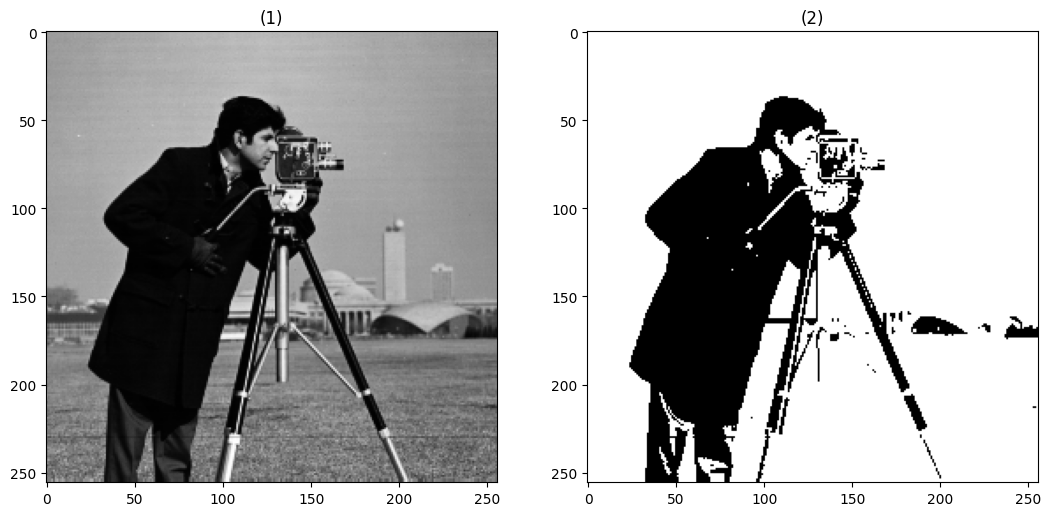

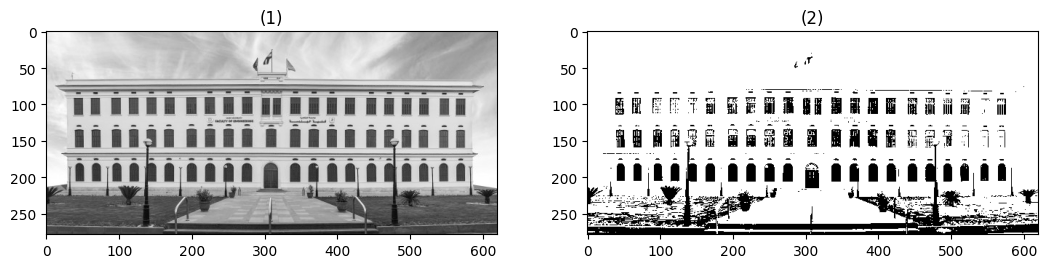

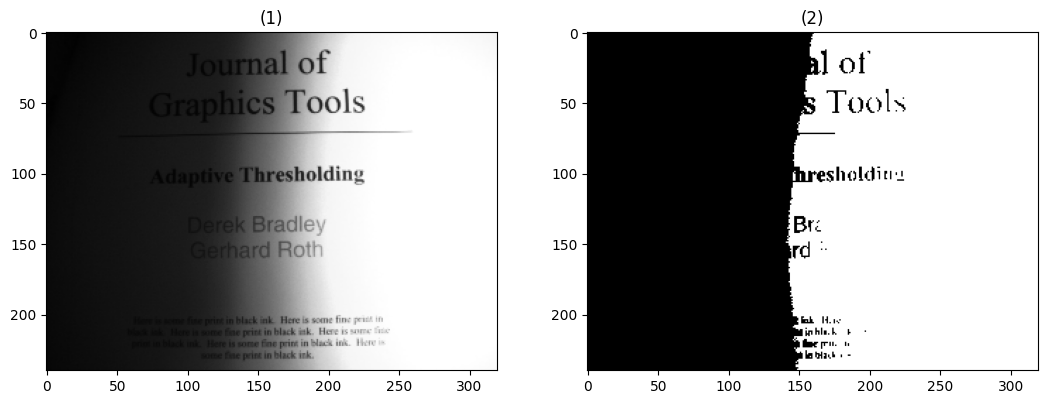

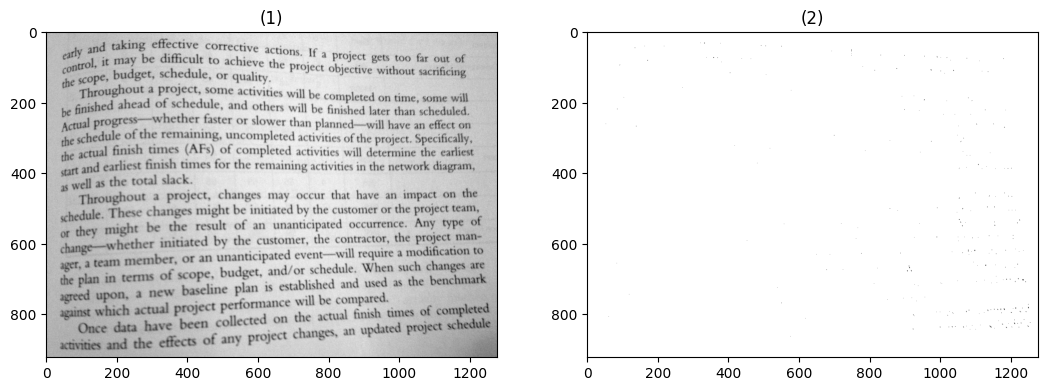

In [7]:
for img in range(len(imgs)):
    show_images([imgs[img], imageProcessing(imgs[img])])


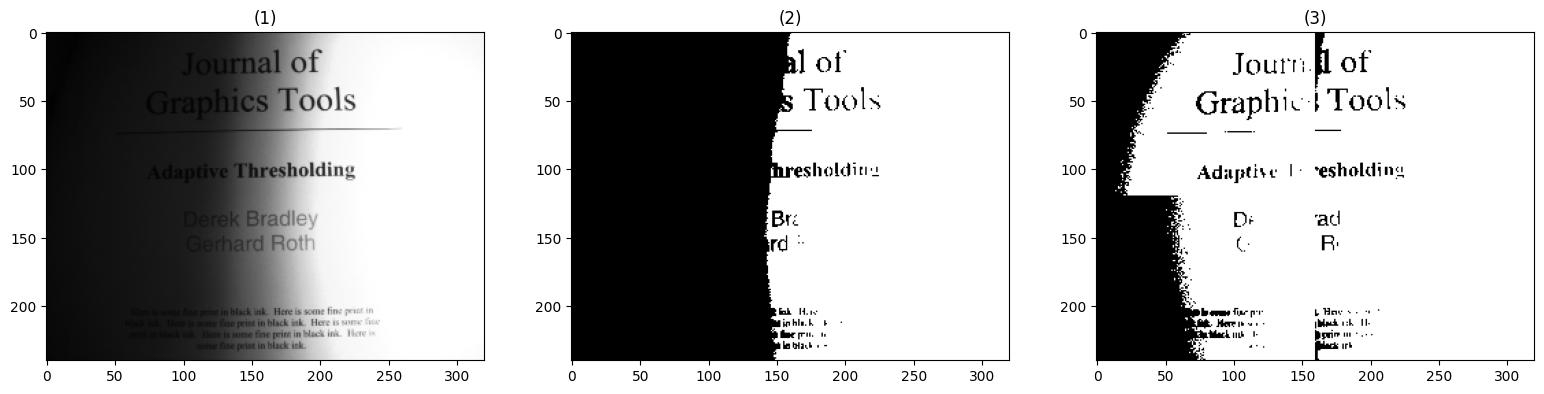

In [13]:
book = io.imread('book.png', as_gray=True)

height = book.shape[0]
width = book.shape[1]

h = height // 2
w = width // 2

q1 = imageProcessing(book[0:h, 0:w])
q2 = imageProcessing(book[0:h, w:])
q3 = imageProcessing(book[h:, 0:w])
q4 = imageProcessing(book[h:, w:])
    
res_img = np.zeros_like(book)
res_img[0:h, 0:w] = q1
res_img[0:h, w:] = q2
res_img[h:, 0:w] = q3
res_img[h:, w:] = q4

show_images([book, imageProcessing(book), res_img])